# Car Prices 

## Prelims: import file, rename cols, explore missing data

### 1. Import JSON file

Observations:
1. The data is in json lines format - each line is a dictionary.
2. This format seems to be very efficient, since the notepad++ file is able to open and view this version of the file. 
3. When I saved the usual 'record' oriented json format the file is too unweildy for notepad++ to allow opening and viewing.

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
from time import perf_counter

In [2]:
t0 = perf_counter()
df = pd.read_json('scout_car.json', lines=True)
t1 = perf_counter()
print(f'{t1 - t0} s')

1.2914866000000003 s


### 2. Fix names: 
1. make all names lowercase
2. remove 'of ', 'nr ', '.', and '&'
3. remove trailing spaces and newline characters
4. replace internal space(s) with underscore

In [3]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

In [4]:
new_cols = {}
for c in df.columns:
    c1 = c.lower()
    c1 = re.sub('\.|&|of ','',c1)
    c1 = c1.strip()
    c1 = re.sub('\s+','_',c1)
    #print(c1)
    new_cols[c] = c1

In [5]:
df.rename(columns=new_cols, inplace=True)

In [6]:
df.to_json('data.json', orient='records', lines=False)

In [7]:
t0 = perf_counter()
df2 = pd.read_json('data.json', orient='records', lines=False)
t1 = perf_counter()
print(f'{t1-t0} s')

1.2545235999999997 s


json(l) and json not lines are both are efficient to store and open using pandas, 1.3s vs 1.1s.

json will not open in notepad++, while json(l) will. 

### 3. Exploring data

Observations:
1. 54 columns.
2. Looking at heads of 10 cols at a time, many of the features are stored as lists rather than int or strings. These go not look like missing when we use coount() method. E.g. "null" is all empty lists, but appear to have no missing values when using count().
3. Some of the feature lists seem to be differerent features. This may be consistent through all rows or not. I will have to check.

In [8]:
cols = [i for i in df.columns]
print(cols)

['url', 'make_model', 'short_description', 'body_type', 'price', 'vat', 'km', 'registration', 'prev_owner', 'kw', 'hp', 'type', 'previous_owners', 'next_inspection', 'inspection_new', 'warranty', 'full_service', 'non-smoking_vehicle', 'null', 'make', 'model', 'offer_number', 'first_registration', 'body_color', 'paint_type', 'body_color_original', 'upholstery', 'body', 'nr_doors', 'nr_seats', 'model_code', 'gearing_type', 'displacement', 'cylinders', 'weight', 'drive_chain', 'fuel', 'consumption', 'co2_emission', 'emission_class', 'comfort_convenience', 'entertainment_media', 'extras', 'safety_security', 'description', 'emission_label', 'gears', 'country_version', 'electricity_consumption', 'last_service_date', 'other_fuel_types', 'availability', 'last_timing_belt_service_date', 'available_from']


In [9]:
missing = {}
for i,c in enumerate(cols):
    m = df[c].count()
    missing[c] = (i, m)
missing = [(missing[k][0], k, missing[k][1]) for k in missing.keys()]
missing.sort(key = lambda t: -1*t[2])
print('index\tn_notNA\tCol_Name')
for c in missing:
    print(f'{c[0]}\t{c[2]}\t{c[1]}')

index	n_notNA	Col_Name
0	15919	url
1	15919	make_model
4	15919	price
6	15919	km
7	15919	registration
10	15919	hp
18	15919	null
19	15919	make
20	15919	model
31	15919	gearing_type
36	15919	fuel
44	15919	description
11	15917	type
2	15873	short_description
3	15859	body_type
27	15859	body
28	15707	nr_doors
32	15423	displacement
23	15322	body_color
40	14999	comfort_convenience
29	14942	nr_seats
43	14937	safety_security
41	14545	entertainment_media
22	14322	first_registration
38	14111	co2_emission
37	14013	consumption
42	12957	extras
39	12898	emission_class
21	12744	offer_number
26	12199	upholstery
25	12160	body_color_original
5	11406	vat
46	11207	gears
15	10499	warranty
33	10239	cylinders
24	10147	paint_type
12	9279	previous_owners
8	9091	prev_owner
35	9061	drive_chain
34	8945	weight
16	8215	full_service
47	7586	country_version
17	7177	non-smoking_vehicle
30	4978	model_code
45	3985	emission_label
14	3932	inspection_new
13	3535	next_inspection
50	880	other_fuel_types
51	635	availability
49	566

ignore is a list of features that can be ignored.

to_encode is a list of features that need to be made into dummy variables

In [10]:
ignore = set()
to_encode = set()

Explore electricity_consumption, n = 137

same entry of [\n0 kWh/100 km (comb)\n] all 137 times it occurs. 

In [11]:
df['electricity_consumption'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n0 kWh/100 km (comb)\n]    137
Name: electricity_consumption, dtype: int64

In [12]:
ignore.add('electricity_consumption')

Explore available_from, n = 272

dates in dd/mm/yy format

In [13]:
df['available_from'].value_counts()

\n31/08/19\n    98
\n30/07/19\n    25
\n15/08/19\n    24
\n16/09/19\n    14
\n29/06/19\n    12
\n01/07/19\n    11
\n28/06/19\n    10
\n19/08/19\n     7
\n10/09/19\n     6
\n26/06/19\n     5
\n27/06/19\n     5
\n10/11/19\n     5
\n08/07/19\n     4
\n25/10/19\n     3
\n15/07/19\n     3
\n01/08/19\n     3
\n04/07/19\n     2
\n05/08/19\n     2
\n24/08/19\n     2
\n16/07/19\n     2
\n20/07/19\n     2
\n05/07/19\n     2
\n30/06/19\n     2
\n30/09/19\n     1
\n31/10/19\n     1
\n27/07/19\n     1
\n02/07/19\n     1
\n10/07/19\n     1
\n19/07/19\n     1
\n24/07/19\n     1
\n29/07/19\n     1
\n29/09/19\n     1
\n18/08/19\n     1
\n14/09/19\n     1
\n18/07/19\n     1
\n16/08/19\n     1
\n24/09/19\n     1
\n17/08/19\n     1
\n10/10/19\n     1
\n06/12/19\n     1
\n03/12/19\n     1
\n05/12/19\n     1
\n11/08/19\n     1
\n10/12/19\n     1
\n01/09/19\n     1
\n03/08/19\n     1
Name: available_from, dtype: int64

In [14]:
ignore.add("available_from")

Explore availability, n = 635/16,000

format: "in " int followed by " days from ordering"

ignore availability

In [15]:
df['availability'].value_counts()

\nin 90 days from ordering\n     196
\nin 120 days from ordering\n    182
\nin 1 day from ordering\n        51
\nin 5 days from ordering\n       35
\nin 3 days from ordering\n       35
\nin 180 days from ordering\n     24
\nin 14 days from ordering\n      24
\nin 7 days from ordering\n       20
\nin 150 days from ordering\n     18
\nin 2 days from ordering\n       16
\nin 60 days from ordering\n      13
\nin 42 days from ordering\n      10
\nin 21 days from ordering\n       8
\nin 4 days from ordering\n        2
\nin 6 days from ordering\n        1
Name: availability, dtype: int64

In [16]:
ignore.add("availability")

Explore last_service_date (n = 566 compared to ~16000)

mostly lists, seems to have the i=0 of last service data in the format mm/yy, buy also have other features mixed up. Once in a while a non-list

Euro 6 seems to be "emission_class" in a handful of cases (5-6) these seem to have been placed in last_service_date column instead of "emission_class". Can be ignored.

and C02/km is "co2_emission" and these can be ignored

Sometimes color (Green) (Blue) these can be ignored

last_service_date may be ignored

In [17]:
df['last_service_date'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n02/2019\n, \nEuro 6\n]                 23
[\n05/2019\n, \nEuro 6\n]                 16
[\n01/2018\n, \n118 g CO2/km (comb)\n]    15
[\n03/2019\n, \nEuro 6\n]                 15
[\n06/2019\n, \nEuro 6\n]                 13
                                          ..
[\n01/2017\n, \n95 g CO2/km (comb)\n]      1
[\n06/2019\n, \n87 g CO2/km (comb)\n]      1
[\n10/2018\n, \n100 g CO2/km (comb)\n]     1
[\n02/2018\n, \n97 g CO2/km (comb)\n]      1
[\n03/2019\n, \n120 g CO2/km (comb)\n]     1
Name: last_service_date, Length: 266, dtype: int64

In [18]:
lsd_vc = df['last_service_date'].value_counts()
lsd_vc


TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n02/2019\n, \nEuro 6\n]                 23
[\n05/2019\n, \nEuro 6\n]                 16
[\n01/2018\n, \n118 g CO2/km (comb)\n]    15
[\n03/2019\n, \nEuro 6\n]                 15
[\n06/2019\n, \nEuro 6\n]                 13
                                          ..
[\n01/2017\n, \n95 g CO2/km (comb)\n]      1
[\n06/2019\n, \n87 g CO2/km (comb)\n]      1
[\n10/2018\n, \n100 g CO2/km (comb)\n]     1
[\n02/2018\n, \n97 g CO2/km (comb)\n]      1
[\n03/2019\n, \n120 g CO2/km (comb)\n]     1
Name: last_service_date, Length: 266, dtype: int64

In [19]:
lsd_vc_index = [i for i in lsd_vc.index]
lsd_vc_index

[['\n02/2019\n', '\nEuro 6\n'],
 ['\n05/2019\n', '\nEuro 6\n'],
 ['\n01/2018\n', '\n118 g CO2/km (comb)\n'],
 ['\n03/2019\n', '\nEuro 6\n'],
 ['\n06/2019\n', '\nEuro 6\n'],
 ['\n04/2019\n', '\nEuro 6\n'],
 ['\n01/2019\n', '\nEuro 6\n'],
 ['\n12/2018\n', '\nEuro 6\n'],
 ['\n10/2018\n', '\nEuro 6\n'],
 '\n02/2019\n',
 ['\n05/2018\n', '\nEuro 6\n'],
 ['\n11/2018\n', '\nEuro 6\n'],
 ['\n05/2019\n', '\n120 g CO2/km (comb)\n'],
 ['\n09/2018\n', '\nEuro 6\n'],
 ['\n08/2018\n', '\nEuro 6\n'],
 ['\n06/2018\n', '\nEuro 6\n'],
 '\n12/2018\n',
 '\n05/2019\n',
 ['\n04/2018\n', '\nEuro 6\n'],
 ['\n12/2018\n'],
 '\n03/2019\n',
 ['\n05/2019\n', '\n127 g CO2/km (comb)\n'],
 ['\n01/2019\n', '\n120 g CO2/km (comb)\n'],
 ['\n06/2019\n', '\n104 g CO2/km (comb)\n'],
 ['\n01/2019\n'],
 ['\n07/2018\n', '\nEuro 6\n'],
 ['\n06/2017\n', '\n114 g CO2/km (comb)\n'],
 '\n04/2019\n',
 '\n07/2018\n',
 ['\n03/2019\n', '\n99 g CO2/km (comb)\n'],
 '\n06/2018\n',
 ['\n04/2019\n'],
 ['\n01/2019\n', '\n127 g CO2/km (comb)\

In [20]:
df['emission_class'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nEuro 6\n]          10139
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: emission_class, dtype: int64

In [21]:
df['last_service_date'][df['emission_class'].isna()].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n01/2018\n, \n118 g CO2/km (comb)\n]                                                             15
[\n05/2017\n, \n118 g CO2/km (comb)\n]                                                              3
[\n05/2018\n, \n130 g CO2/km (comb)\n]                                                              3
[\n02/2017\n, \n102 g CO2/km (comb)\n]                                                              3
[\n12/2018\n]                                                                                       3
[\n06/2017\n, \n114 g CO2/km (comb)\n]                                                              3
[\n01/2019\n, \n127 g CO2/km (comb)\n]                                                              2
[\n02/2019\n]                                                                                       2
[\n04/2019\n]                                                                                       2
[\n06/2019\n, \nEuro 6\n]                                                         

In [22]:
df['co2_emission'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n120 g CO2/km (comb)\n]      740
[[], [], []]                   628
[\n99 g CO2/km (comb)\n]       545
[\n97 g CO2/km (comb)\n]       537
[\n104 g CO2/km (comb)\n]      501
                              ... 
[\n14 g CO2/km (comb)\n]         1
[\n1,060 g CO2/km (comb)\n]      1
[\n51 g CO2/km (comb)\n]         1
[\n165 g CO2/km (comb)\n]        1
[\n193 g CO2/km (comb)\n]        1
Name: co2_emission, Length: 123, dtype: int64

In [23]:
df['last_service_date'][df['co2_emission'].isna()].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n04/2019\n]                4
[\n01/2019\n]                4
[\n12/2018\n]                3
[\n02/2019\n]                3
[\n09/2018\n]                2
[\n11/2018\n]                2
\n05/2019\n                  1
[\n06/2019\n]                1
[\n12/2018\n, \nEuro 6\n]    1
[\n07/2018\n]                1
[\n09/2018\n, \nEuro 6\n]    1
Name: last_service_date, dtype: int64

In [24]:
ignore.add('last_service_date')

Exlore 'other_fuel_types'

Empty lists, can be ignored.

In [25]:
df['other_fuel_types'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[[], [], []]    880
Name: other_fuel_types, dtype: int64

In [26]:
ignore.add('other_fuel_types')

Explore 'next_inspection' n = 3535

most often mm/yyyy entry. Sometimes repeated c02_emission or emission_label. Not much new information. 

In [27]:
df['next_inspection'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\n04/2022\n                               62
\n03/2021\n                               38
\n03/2022\n                               36
\n06/2021\n                               34
\n01/2022\n                               32
                                          ..
[\n12/2018\n, \n97 g CO2/km (comb)\n]      1
[\n03/2022\n, \n1 (No sticker)\n]          1
[\n05/2021\n, \n93 g CO2/km (comb)\n]      1
[\n06/2021\n, \n93 g CO2/km (comb)\n]      1
[\n01/2022\n, \n168 g CO2/km (comb)\n]     1
Name: next_inspection, Length: 1399, dtype: int64

In [28]:
df['next_inspection'][df['co2_emission'].isna()].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n06/2021\n, \n4 (Green)\n]    20
[\n05/2021\n, \n4 (Green)\n]    14
[\n06/2021\n]                   13
[\n03/2021\n, \n4 (Green)\n]    11
[\n06/2021\n, \nEuro 6\n]        7
                                ..
[\n11/2019\n, \nEuro 6\n]        1
[\n10/2019\n, \n4 (Green)\n]     1
\n07/2017\n                      1
[\n02/2021\n, \nEuro 6c\n]       1
[\n10/2020\n]                    1
Name: next_inspection, Length: 82, dtype: int64

In [29]:
df['next_inspection'][df['co2_emission'].isna()].value_counts()[:50]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n06/2021\n, \n4 (Green)\n]    20
[\n05/2021\n, \n4 (Green)\n]    14
[\n06/2021\n]                   13
[\n03/2021\n, \n4 (Green)\n]    11
[\n06/2021\n, \nEuro 6\n]        7
[\n02/2021\n, \n4 (Green)\n]     6
[\n06/2019\n, \n4 (Green)\n]     6
[\n01/2021\n, \n4 (Green)\n]     6
[\n03/2020\n, \n4 (Green)\n]     6
[\n03/2019\n, \n4 (Green)\n]     5
\n03/2022\n                      5
\n10/2018\n                      4
[\n04/2021\n, \n4 (Green)\n]     4
[\n02/2019\n, \n4 (Green)\n]     4
[\n05/2019\n, \n4 (Green)\n]     4
[\n04/2019\n, \n4 (Green)\n]     4
\n02/2020\n                      3
[\n07/2020\n, \n4 (Green)\n]     3
[\n06/2020\n, \n4 (Green)\n]     3
\n03/2017\n                      3
\n07/2021\n                      3
[\n02/2020\n, \n4 (Green)\n]     3
\n06/2021\n                      3
[\n02/2021\n, \nEuro 6\n]        3
[\n10/2020\n, \n4 (Green)\n]     3
\n03/2021\n                      3
\n02/2021\n                      2
[\n07/2019\n, \n4 (Green)\n]     2
\n04/2017\n         

In [30]:
df['next_inspection'][df['emission_label'].isna()].value_counts()[:50]
# quite a lot of

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\n04/2022\n                               35
\n03/2021\n                               31
\n01/2022\n                               30
\n03/2022\n                               29
\n04/2021\n                               26
\n06/2021\n                               25
\n05/2021\n                               24
\n05/2022\n                               24
\n05/2019\n                               23
[\n06/2021\n, \n97 g CO2/km (comb)\n]     22
[\n06/2021\n, \nEuro 6\n]                 21
[\n06/2021\n, \n119 g CO2/km (comb)\n]    21
\n03/2020\n                               20
\n01/2023\n                               19
[\n06/2021\n, \n102 g CO2/km (comb)\n]    18
[\n05/2021\n, \n108 g CO2/km (comb)\n]    15
\n02/2021\n                               15
[\n06/2021\n, \n99 g CO2/km (comb)\n]     15
\n02/2022\n                               14
\n02/2020\n                               14
\n06/2022\n                               14
\n09/2021\n                               14
\n07/2019\

In [31]:
ignore.add('next_inspection')

Explore 'inspection_new'. N = 3932

Mostly lists, index 0 has 'Yes'. Can we assume missing is 'No'?

In [32]:
df['inspection_new'].value_counts()[:50]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nYes\n, \nEuro 6\n]                                                                          523
\nYes\n                                                                                        362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                             174
[\nYes\n, \n4 (Green)\n]                                                                       166
[\nYes\n, \nEuro 6d-TEMP\n]                                                                    134
[\nYes\n, \n97 g CO2/km (comb)\n]                                                               89
[\nYes\n, \n0 kWh/100 km (comb)\n]                                                              86
[\nYes\n, \n119 g CO2/km (comb)\n]                                                              84
[\nYes\n, \n128 g CO2/km (comb)\n]                                                              81
[\nYes\n]                                                                                       80
[\nYes\n, 

In [33]:
df['inspection_new'][df['co2_emission'].isna()].value_counts()[:50]
# no new co2_emission information

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nYes\n, \n4 (Green)\n]                                                                       134
[\nYes\n]                                                                                       64
\nYes\n                                                                                         26
[\nYes\n, \nEuro 6\n]                                                                           22
[\nYes\n, \n, 4.4 l/100 km (comb), \n, 5.4 l/100 km (city), \n, 3.8 l/100 km (country), \n]      1
[\nYes\n, \n, 4.5 l/100 km (comb), \n, 5.5 l/100 km (city), \n, 3.9 l/100 km (country), \n]      1
[\nYes\n, \nEuro 6d-TEMP\n]                                                                      1
[\nYes\n, \n, 4.9 l/100 km (comb), \n, \n, \n]                                                   1
[\nYes\n, \n1 (No sticker)\n]                                                                    1
[\nYes\n, \n, 6.2 l/100 km (comb), \n, 7.8 l/100 km (city), \n, 5.3 l/100 km (country), \n]      1
Name: insp

In [34]:
df['next_inspection'][df['inspection_new'].isna()].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\n04/2022\n                                                                                        60
\n03/2021\n                                                                                        37
\n03/2022\n                                                                                        35
\n01/2022\n                                                                                        31
[\n08/2021\n, \n135 g CO2/km (comb)\n]                                                             28
                                                                                                   ..
[\n02/2022\n, \n160 g CO2/km (comb)\n]                                                              1
[\n02/2022\n, \n130 g CO2/km (comb)\n]                                                              1
[\n03/2022\n, \n, 6.1 l/100 km (comb), \n, 7.5 l/100 km (city), \n, 5.2 l/100 km (country), \n]     1
[\n01/2022\n, \n, 6.1 l/100 km (comb), \n, 7.5 l/100 km (city), \n, 5.2 l/100 km (

In [35]:
df['inspection_new'][df['type'].notna()].value_counts()
# no new information about new/used

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nYes\n, \nEuro 6\n]                                                                          523
\nYes\n                                                                                        362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                             174
[\nYes\n, \n4 (Green)\n]                                                                       166
[\nYes\n, \nEuro 6d-TEMP\n]                                                                    134
                                                                                              ... 
[\nYes\n, \n, 5.2 l/100 km (comb), \n, 6.7 l/100 km (city), \n, 4.2 l/100 km (country), \n]      1
[\nYes\n, \n100 g CO2/km (comb)\n]                                                               1
[\nYes\n, \n, 4.9 l/100 km (comb), \n, 5.9 l/100 km (city), \n, 4.3 l/100 km (country), \n]      1
[\nYes\n, \n, 5.1 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.3 l/100 km (country), \n]      1
[\nYes\n, 

In [36]:
ignore.add('inspection_new')

Explore 'model_code', n = 5000 or so.

In [37]:
df['model_code'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n0035/BCB\n]    268
[\n0588/BNO\n]    245
[\n0588/BDB\n]    206
[\n0588/BHX\n]    188
[\n1844/ADJ\n]    175
                 ... 
[\n0000/ACP\n]      1
[\n0035/BGY\n]      1
[\n0035/bgp\n]      1
[\n0035/BGS\n]      1
[\n3333/BKG\n]      1
Name: model_code, Length: 232, dtype: int64

In [38]:
ignore.add('model_code')

Explore 'non-smoking_vehicle' n ~ 7200

Lists empty at i=0, 1. 

no new imformation

In [39]:
df['non-smoking_vehicle'].value_counts()[50:]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, \n, \n136 g CO2/km (comb)\n]                                                             3
[\n, \n, \n110 g CO2/km (comb)\n]                                                             3
[\n, \n, \n148 g CO2/km (comb)\n]                                                             3
[\n, \n, \n157 g CO2/km (comb)\n]                                                             3
[\n, \n, \n95 g CO2/km (comb)\n]                                                              3
[\n, \n, \n119 g CO2/km (comb)\n]                                                             3
[\n, \n, \n149 g CO2/km (comb)\n]                                                             3
[\n, \n, \n166 g CO2/km (comb)\n]                                                             2
[\n, \n, \n138 g CO2/km (comb)\n]                                                             2
[\n, \n, \n121 g CO2/km (comb)\n]                                                             2
[\n, \n, \n111 g CO2/km (comb)\n]       

In [40]:
ignore.add('non_smoking_vehicle')

Explore 'country_version', n ~ 7500

We should not ignore this.

We can make this a binary of country_version with True or False for most frequent countries.

Why is this infomation missing for 8000+ cars? No pattern in missing data by make, registration or first_registration, .

When encoding, we will not consider any countries with freq. less than 100. Club these into 'other'

Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1

In [41]:
df['country_version'] = [x[0].strip() if x.__class__ == list else x for x in df['country_version'] ]
df['country_version'].value_counts()

Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: country_version, dtype: int64

In [42]:
df['country_version'].isna().sum()

8333

In [43]:
others = set(['Czech Republic', 'Poland', 'France', 'Denmark', 'Hungary', 'Japan', 'Slovakia', 'Croatia', 'Sweden',
'Romania', 'Bulgaria', 'Luxembourg', 'Switzerland', 'Slovenia', 'Egypt', 'Serbia'])

In [44]:
df['temp'] = ['other' if x in others else x for x in df['country_version']]
df['temp'] = [x.lower() if x.__class__ == str else x for x in df['temp']] 

In [45]:
df['temp'].value_counts()

germany           4502
italy             1038
european union     507
netherlands        464
spain              325
belgium            314
other              228
austria            208
Name: temp, dtype: int64

In [46]:
temp = [i for i in df['temp']]
df['country_ver'] = temp.copy()

In [47]:
to_encode.add('country_ver')
ignore.add('country_version')

In [48]:
df['make'] = [x.strip() if x.__class__ == str else x for x in df['make'] ]
df['make'].value_counts()

Opel       7343
Audi       5712
Renault    2864
Name: make, dtype: int64

In [49]:
df['make'][df['country_version'].isna()].value_counts()

Opel       3518
Audi       3280
Renault    1535
Name: make, dtype: int64

In [50]:
df['first_registration'] = [int(x[1].strip()) if x.__class__ == list else x for x in df['first_registration']]
df['first_registration'].value_counts()

2018.0    4522
2016.0    3674
2017.0    3273
2019.0    2853
Name: first_registration, dtype: int64

In [51]:
df['first_registration'][df['country_version'].isna()].value_counts()

2018.0    2344
2016.0    2154
2017.0    2074
2019.0    1365
Name: first_registration, dtype: int64

<AxesSubplot:>

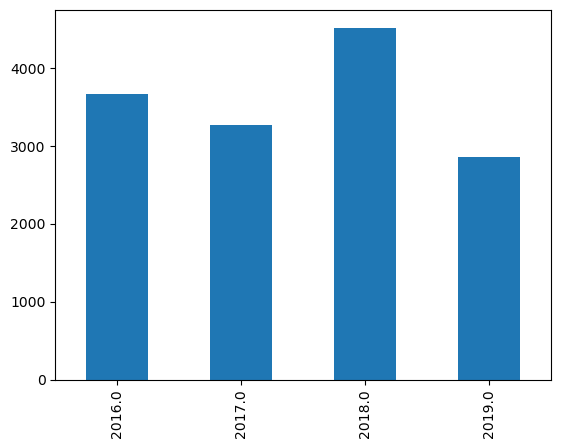

In [52]:
reg_freq = df['first_registration'].value_counts().sort_index()
reg_freq.plot.bar()

<AxesSubplot:>

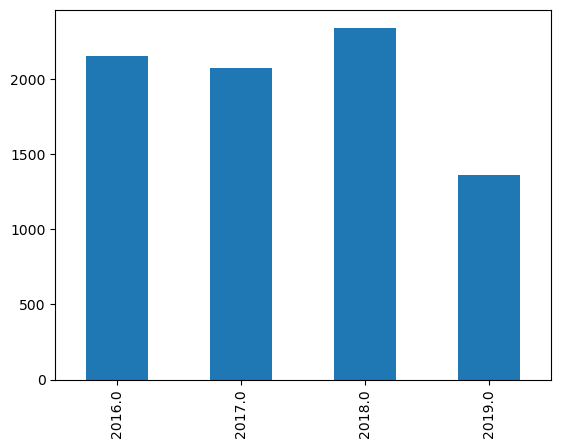

In [53]:
reg_freq = df['first_registration'][df['country_version'].isna()].value_counts().sort_index()
reg_freq.plot.bar()

Explore 'full_service', n ~ 8200

Seems to be lists with missing values in i = 0, 1

We can ignore this feature

In [54]:
df['full_service'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, \n, \n4 (Green)\n]                                                                       2235
[\n, \n, \nEuro 6\n]                                                                          2097
[\n, \n]                                                                                      1702
[\n, \n, \nEuro 6d-TEMP\n]                                                                     399
\n                                                                                             283
                                                                                              ... 
[\n, \n, \n, 6 l/100 km (comb), \n, 8 l/100 km (city), \n, 4.9 l/100 km (country), \n]           1
[\n, \n, \n84 g CO2/km (comb)\n]                                                                 1
[\n, \n, \n87 g CO2/km (comb)\n]                                                                 1
[\n, \n, \n, 5.7 l/100 km (comb), \n, 7.3 l/100 km (city), \n, 4.9 l/100 km (country), \n]       1
[\n, \n, \

In [55]:
ignore.add('full_service')

Explore 'weight', n = ~9000

format is [\n"num kg"\n], num has "," after thousands place

Why is this information missing for many cars? Maybe we can fill this when missing by average of weight by model_make

In [56]:
df['weight'].isna().sum()

6974

In [57]:
df['weight'].value_counts()[100:150]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n1,635 kg\n]    20
[\n1,198 kg\n]    19
[\n1,890 kg\n]    19
[\n1,370 kg\n]    19
[\n1,225 kg\n]    19
[\n1,582 kg\n]    19
[\n1,310 kg\n]    18
[\n1,537 kg\n]    18
[\n1,655 kg\n]    17
[\n1,843 kg\n]    16
[\n1,400 kg\n]    16
[\n1,518 kg\n]    16
[\n1,540 kg\n]    16
[\n1,380 kg\n]    15
[\n1,055 kg\n]    15
[\n1,760 kg\n]    15
[\n1,235 kg\n]    15
[\n2,353 kg\n]    15
[\n1,510 kg\n]    14
[\n1,708 kg\n]    14
[\n1,596 kg\n]    14
[\n1,305 kg\n]    14
[\n1,640 kg\n]    14
[\n1,270 kg\n]    13
[\n1,815 kg\n]    13
[\n1,079 kg\n]    13
[\n1,630 kg\n]    13
[\n1,758 kg\n]    13
[\n1,340 kg\n]    12
[\n2,300 kg\n]    12
[\n1,240 kg\n]    12
[\n1,378 kg\n]    12
[\n1,100 kg\n]    12
[\n1,214 kg\n]    12
[\n1,647 kg\n]    11
[\n980 kg\n]      11
[\n1,234 kg\n]    11
[\n1,684 kg\n]    11
[\n1,717 kg\n]    11
[\n1,175 kg\n]    11
[\n1,035 kg\n]    11
[\n1,140 kg\n]    11
[\n1,156 kg\n]    10
[\n1,567 kg\n]    10
[\n1,485 kg\n]    10
[\n1,295 kg\n]    10
[\n1,203 kg\n]    10
[\n1,082 kg\n

<AxesSubplot:ylabel='Frequency'>

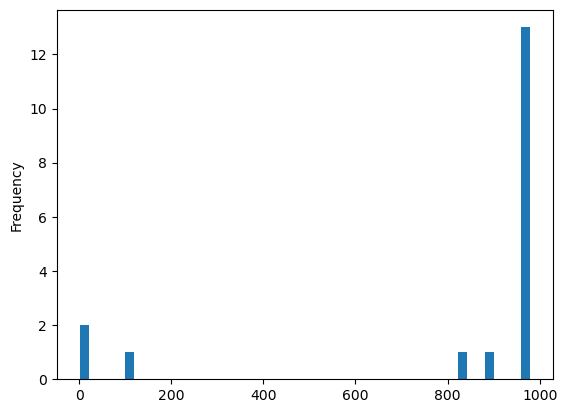

In [58]:
df['weight'] = [int(re.sub('kg|,','',x[0]).strip()) if x.__class__ == list else float('nan') for x in df['weight']]
df['weight'][df['weight']<1000].plot.hist(bins=50)

In [59]:
df['weight'][df['weight']<1000].count()

18

<AxesSubplot:ylabel='Frequency'>

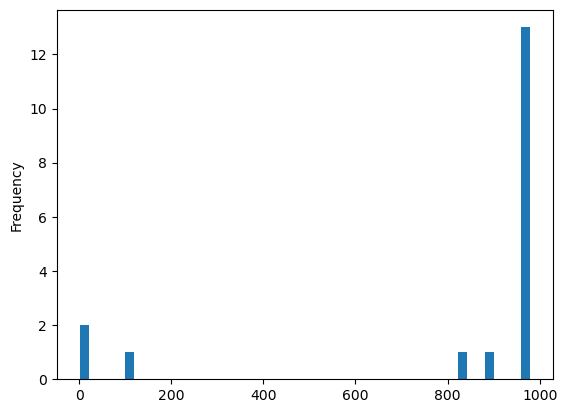

In [60]:
df['weight'][df['weight']<1000].plot.hist(bins=50)

In [61]:
df['weight'][df['weight']>2000].count()

54

<AxesSubplot:ylabel='Frequency'>

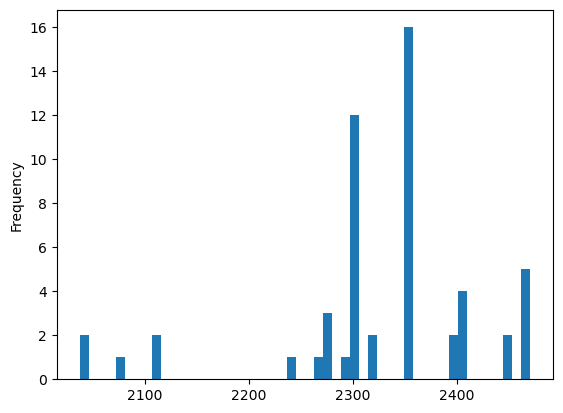

In [62]:
df['weight'][df['weight']>2000].plot.hist(bins=50)

In [63]:
df['weight'] = [float('nan') if (x > 2000 or x < 1000) else x for x in df['weight']]


In [64]:
wts = df[['weight']].groupby(df['make_model'],dropna=True).mean(numeric_only=True)
name_wts = {name:wts.loc[name][0] for name in wts.index}
name_wts

{'Audi A1': 1229.864010989011,
 'Audi A2': nan,
 'Audi A3': 1384.510994764398,
 'Opel Astra': 1361.4719367588932,
 'Opel Corsa': 1173.9120967741935,
 'Opel Insignia': 1574.721124620061,
 'Renault Clio': 1170.1347331583552,
 'Renault Duster': nan,
 'Renault Espace': 1699.1731123388581}

In [65]:
df['make_model'][df['weight'].notna()].value_counts()

Audi A3           1910
Audi A1           1456
Opel Insignia     1316
Opel Astra        1265
Opel Corsa        1240
Renault Clio      1143
Renault Espace     543
Name: make_model, dtype: int64

In [66]:
df['make_model'][df['weight'].isna()].value_counts()

Opel Insignia     1282
Opel Astra        1261
Audi A3           1187
Audi A1           1158
Opel Corsa         979
Renault Clio       696
Renault Espace     448
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

Explore 'drive_chain'

In [67]:
df['drive_chain'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nfront\n]    8886
[\n4WD\n]       171
[\nrear\n]        4
Name: drive_chain, dtype: int64

In [68]:
df['drive_chain'] = [x[0].strip() if x.__class__ == list else x for x in df['drive_chain']]
df['drive_chain'].value_counts()

front    8886
4WD       171
rear        4
Name: drive_chain, dtype: int64

In [69]:
df['drive_chain'] = [float('nan') if x == 'rear' else x for x in df['drive_chain']]

In [70]:
df['drive_chain'] = [x.lower() if x.__class__ == str else x for x in df['drive_chain']]

In [71]:
df['drive_chain'].isna().sum()

6862

In [72]:
to_encode.add('drive_chain')

Explore prev_owner, previous_owners, type

prev_owner is derived from previous_owners after cleaning, except 0 is ignored

there are 15 cases where new cars have 1 "previous_owners", and 24 cases where used cars have 0 "previous_owners"

Also only 164 of 1650 new cars are mentioned to have 0 "previous_owners". We can ignore "0" in "previous_owners". 

in other words, use "prev_owner" and ignore "previous_owners"

In [73]:
df['prev_owner'].value_counts()

1 previous owner     8294
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [74]:
df['previous_owners'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\n1\n                                                                                        8101
\n2\n                                                                                         766
\n0\n                                                                                         163
\n3\n                                                                                          17
[\n1\n, \n168 g CO2/km (comb)\n]                                                               13
                                                                                             ... 
[\n1\n, \n111 g CO2/km (comb)\n]                                                                1
[\n1\n, \nEuro 6\n]                                                                             1
[\n2\n, \n119 g CO2/km (comb)\n]                                                                1
[\n1\n, \n, 6.6 l/100 km (comb), \n, 8.1 l/100 km (city), \n, 5.7 l/100 km (country), \n]       1
[\n1\n, \n142 g CO2/

In [75]:
df['prev_owner'] = [re.sub(r'[A-Za-z]','',x).strip().lstrip() if x.__class__ == str else x for x in df['prev_owner']]
df['prev_owner'].value_counts()

1    8294
2     778
3      17
4       2
Name: prev_owner, dtype: int64

In [76]:
df['prev_owner'] = [('2' if float(x) > 2 else x) if x.__class__ == str else float('nan') for x in df['prev_owner']]
df['prev_owner'].value_counts()

1    8294
2     797
Name: prev_owner, dtype: int64

In [77]:
df['previous_owners'] = [re.sub(r'[A-Za-z]','',x[0]) if x.__class__ == list else x for x in df['previous_owners']]
df['previous_owners'] = [x.strip() if x.__class__ == str else x for x in df['previous_owners']]
df['previous_owners'].value_counts()

1    8294
2     778
0     188
3      17
4       2
Name: previous_owners, dtype: int64

In [78]:
df['type'] = [x[1].strip() if x.__class__ == list else x for x in df['type']]
df['type'].value_counts()

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: type, dtype: int64

In [79]:
df['previous_owners'][df['type'] == 'New'].value_counts()
# interesting

0    164
1     15
Name: previous_owners, dtype: int64

In [80]:
df['prev_owner'][df['type'] != 'New'].value_counts()

1    8279
2     797
Name: prev_owner, dtype: int64

In [81]:
df['type'] = [re.sub('-|\s','_',x.lower()) if x.__class__ == str else x for x in df['type']]
df['type'] = [re.sub('\'','',x.lower()) if x.__class__ == str else x for x in df['type']]

In [82]:
df['type'].value_counts()

used              11096
new                1650
pre_registered     1364
employees_car      1011
demonstration       796
Name: type, dtype: int64

In [83]:
ignore.add('previous_owners')

In [84]:
to_encode.add('prev_owner')

In [85]:
to_encode.add('type')

Explore "paint_type"

In [86]:
df['paint_type'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nMetallic\n]       9794
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: paint_type, dtype: int64

In [87]:
df['paint_type'] = [x[0].strip() if x.__class__ == list else x for x in df['paint_type']]
df['paint_type'].value_counts()

Metallic       9794
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

In [88]:
df['paint_type'] = [float('nan') if x == 'Perl effect' else x for x in df['paint_type']]
df['paint_type'].value_counts()

Metallic     9794
Uni/basic     347
Name: paint_type, dtype: int64

In [89]:
df['paint_type'] = [('uni_basic' if x == 'Uni/basic' else x) for x in df['paint_type']]
df['paint_type'] = [('metallic' if x == 'Metallic' else x) for x in df['paint_type']]

In [90]:
df['paint_type'].value_counts()

metallic     9794
uni_basic     347
Name: paint_type, dtype: int64

In [91]:
to_encode.add('paint_type')

Explore cylinders

In [92]:
df['cylinders'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n4\n]    8105
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n8\n]       2
[\n2\n]       2
[\n1\n]       1
Name: cylinders, dtype: int64

In [93]:
df['cylinders'] = [x[0].strip().lstrip() if x.__class__ == list else x for x in df['cylinders']]
df['cylinders'].value_counts()

4    8105
3    2104
5      22
6       3
8       2
2       2
1       1
Name: cylinders, dtype: int64

In [94]:
df['cylinders'] = ['3_or_less' if float(x) <= 3 else ('4_or_more' if (9 > float(x) >= 4) else x) for x in df['cylinders']]
df['cylinders'].value_counts()

4_or_more    8132
3_or_less    2107
Name: cylinders, dtype: int64

In [95]:
to_encode.add('cylinders')

Explore warranty

create warranty_mo a feature with float: months of warranty

In [96]:
df['warranty'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, \n, \nEuro 6\n]                                                                               1868
\n12 months\n                                                                                      1177
\n                                                                                                  979
\n24 months\n                                                                                       566
[\n, \n, \n4 (Green)\n]                                                                             517
                                                                                                   ... 
[\n72 months\n, \n125 g CO2/km (comb)\n]                                                              1
[\n60 months\n, \n14 g CO2/km (comb)\n]                                                               1
[\n24 months\n, \n121 g CO2/km (comb)\n]                                                              1
[\n12 months\n, \nEuro 6d\n]                                    

In [97]:
df['warranty_mo'] = [x[0].strip() if x.__class__ == list else x for x in df['warranty']]
df['warranty_mo'] = [re.sub('\n| months','',x) if x.__class__ == str else x for x in df['warranty_mo']]
df['warranty_mo'] = [float('nan') if x == '' else float(x) for x in df['warranty_mo']]
df['warranty_mo'].value_counts()

12.0    2594
24.0    1118
60.0     401
36.0     279
48.0     149
6.0      125
72.0      59
3.0       33
23.0      11
18.0      10
20.0       7
25.0       6
2.0        5
50.0       4
26.0       4
16.0       4
4.0        3
1.0        3
19.0       3
34.0       3
13.0       3
28.0       2
22.0       2
14.0       2
11.0       2
46.0       2
21.0       2
9.0        2
17.0       2
45.0       2
33.0       1
40.0       1
65.0       1
10.0       1
15.0       1
7.0        1
8.0        1
56.0       1
49.0       1
47.0       1
30.0       1
Name: warranty_mo, dtype: int64

In [98]:
ignore.add('warranty')

Explore gears

One case of 50 gears, seems like a typo, replace with nan

Since we do not expect this to be a continuous variable we can make these into dummies

In [99]:
df['gears'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n6\n]     5822
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n1\n]        2
[\n3\n]        2
[\n4\n]        2
[\n2\n]        1
[\n50\n]       1
Name: gears, dtype: int64

In [100]:
df['temp'] = [x[0].strip() if x.__class__ == list else x for x in df['gears']]
df['temp'].value_counts()

6     5822
5     3239
7     1908
8      224
9        6
1        2
3        2
4        2
2        1
50       1
Name: temp, dtype: int64

In [101]:
df['temp'] = [('5' if float(x) < 5 else x) if x.__class__ == str else x for x in df['temp']]
df['temp'] = [('8' if float(x) > 8 else x) if x.__class__ == str else x for x in df['temp']]
df['gears'] = df['temp'].copy()
df['gears'].value_counts()

6    5822
5    3246
7    1908
8     231
Name: gears, dtype: int64

In [102]:
df['gears'] = [('5' if float(x) < 5 else x) if x.__class__ == str else x for x in df['gears']]

In [103]:
to_encode.add('gears')

Explore vat, 

create a dummy vat_deductible

In [104]:
df['vat'].value_counts()

VAT deductible      10980
Price negotiable      426
Name: vat, dtype: int64

In [105]:
df['vat_deductible'] = [1 if x == "VAT deductible" else 0 for x in df['vat']]
df['vat_deductible'].value_counts()

1    10980
0     4939
Name: vat_deductible, dtype: int64

In [106]:
ignore.add('vat')

Explore body_color, body_color_original

Extracting strings from texts

Can make these into dummies

In [107]:
df['body_color_original'].isna().value_counts()

False    12160
True      3759
Name: body_color_original, dtype: int64

In [108]:
df['body_color_original'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nOnyx Schwarz\n]                     338
[\nBianco\n]                           282
[\nMythosschwarz Metallic\n]           238
[\nBrillantschwarz\n]                  216
[\nGris\n]                             204
                                      ... 
[\nRouge-Braun (G0Y)\n]                  1
[\nVARI COLRI DISPONIBILI\n]             1
[\nKokosnussbraun Metallic\n]            1
[\nFarbe frei wählbar\n]                 1
[\nPerlmutt-Weiß Metallic (Weiß)\n]      1
Name: body_color_original, Length: 1927, dtype: int64

In [109]:
df['body_color_original'] = [re.sub('\n','',x[0])  if (x.__class__ == list) else x 
                             for x in df['body_color_original']]

In [110]:
df['body_color_original'].value_counts()

Onyx Schwarz                     338
Bianco                           282
Mythosschwarz Metallic           238
Brillantschwarz                  216
Gris                             204
                                ... 
Rouge-Braun (G0Y)                  1
VARI COLRI DISPONIBILI             1
Kokosnussbraun Metallic            1
Farbe frei wählbar                 1
Perlmutt-Weiß Metallic (Weiß)      1
Name: body_color_original, Length: 1927, dtype: int64

In [111]:
df['body_color'].isna().value_counts()

False    15322
True       597
Name: body_color, dtype: int64

In [112]:
df['body_color'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: body_color, dtype: int64

In [113]:
df['body_color'] = [re.sub('\n','',x[1])  if (x.__class__ == list) else x 
                             for x in df['body_color']]

In [114]:
vc = df['body_color'].value_counts()
make_others = [i for i in vc.index][-4:]
make_others

['Violet', 'Bronze', 'Orange', 'Gold']

In [115]:
df['body_color'] = ['other' if x in make_others else x for x in df['body_color']]
df['body_color'].value_counts()

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
Brown      289
Green      154
Beige      108
Yellow      51
other       29
Name: body_color, dtype: int64

In [116]:
df['body_color'] = [x.lower() if x.__class__ == str else x for x in df['body_color']]
df['body_color'].value_counts()

black     3745
grey      3505
white     3406
silver    1647
blue      1431
red        957
brown      289
green      154
beige      108
yellow      51
other       29
Name: body_color, dtype: int64

In [117]:
ignore.add('body_color_original')
to_encode.add('body_color')

Explore upholstery

Split it into upholstery_material and upholstery_color

In [118]:
df['upholstery'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nCloth, Black\n]           5821
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nPart leather, Grey\n]      116
[\nFull leather, Brown\n]     116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nFull leather, Beige\n]      36
[\nVelour, Black\n]            36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nBrown\n]                    12
[\nCloth, Blue\n]              12
[\nCloth, White\n]              8
[\nVelour, Gre

In [119]:
df['upholstery_material'] = [re.sub('\n|,','',x[0].split(',')[0])  if (x.__class__ == list) else x 
                             for x in df['upholstery']]
colors = ['Black', 'Grey', 'Brown', 'Beige', 'Blue', 'White']
df['upholstery_material'] = [float('nan') if x in colors else x for x in df['upholstery_material']]
df['upholstery_material'] = [x.lower() if x.__class__ == str else x for x in df['upholstery_material']]
df['upholstery_material'].value_counts() 

cloth           8423
part leather    1499
full leather    1009
other            368
velour            60
alcantara         57
Name: upholstery_material, dtype: int64

In [120]:
material = [i for i in df['upholstery_material'].value_counts().index]
df['upholstery_color'] = [re.sub('\n|,','',x[0].split(',')[-1].strip()) if x.__class__ == list else x for x in df['upholstery']]
df['upholstery_color'] = [float('nan') if x in material else x for x in df['upholstery_color']]
df['upholstery_color'] = [x.lower() if x.__class__ == str else x for x in df['upholstery_color']]
df['upholstery_color'].value_counts()

black           8201
grey            1376
other           1016
cloth           1005
brown            207
part leather     140
full leather     139
beige             54
velour            16
blue              16
white             13
red                9
yellow             4
orange             1
Name: upholstery_color, dtype: int64

In [121]:
vc = df['upholstery_color'].value_counts()
other_color = [i for i in vc.index][-5:]
df['upholstery_color'] = ['other' if x in other_color else x for x in df['upholstery_color']]

In [122]:
df['upholstery_color'].value_counts()

black           8201
grey            1376
other           1059
cloth           1005
brown            207
part leather     140
full leather     139
beige             54
velour            16
Name: upholstery_color, dtype: int64

In [123]:
ignore.add('upholstery')
to_encode.add('upholstery_color')
to_encode.add('upholstery_material')

Explore offer_number 

Seems to be a unique identifier, can ignore

In [124]:
ignore.add('offer_number')

Explore emission_class

Can be encoded to dummies

In [125]:
df['emission_class'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nEuro 6\n]          10139
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: emission_class, dtype: int64

In [126]:
df['temp'] = [x[0] if x.__class__ == list else x for x in df['emission_class']]
df['temp'] = [float('nan') if x.__class__ == list else x for x in df['temp']]
df['temp'] = [re.sub('\n','',x) if x.__class__ == str else x for x in df['temp']]
df['temp'].value_counts()

Euro 6          10139
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: temp, dtype: int64

In [127]:
df['emission_class'] = df['temp'].copy()

In [128]:
df['emission_class'] = [x.lower() if x.__class__ == str else x for x in df['emission_class']]

In [129]:
df['emission_class'].value_counts()

euro 6          10139
euro 6d-temp     1845
euro 6c           127
euro 5             78
euro 6d            62
euro 4             40
Name: emission_class, dtype: int64

Explore extras

Collect unique extra features in a new list extra_features

Make extra features into dummy variables

In [130]:
df['extras'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Alloy wheels]                                                                                                     3245
[Alloy wheels, Touch screen]                                                                                        697
[Alloy wheels, Voice Control]                                                                                       577
[Alloy wheels, Touch screen, Voice Control]                                                                         541
[Alloy wheels, Roof rack]                                                                                           385
                                                                                                                   ... 
[Alloy wheels, Catalytic Converter, Shift paddles, Sport package, Sport seats, Sport suspension, Voice Control]       1
[Alloy wheels, Catalytic Converter, Roof rack, Sport package, Sport seats, Trailer hitch]                             1
[Alloy wheels, Catalytic Converter, Ski 

In [131]:
extra_features = set()
for li in df['extras']:
    if li.__class__ != list:
        continue
    for ef in li:
        extra_features.add(ef)
print(extra_features)

{'Touch screen', 'Roof rack', 'Voice Control', 'Handicapped enabled', 'Alloy wheels', 'Trailer hitch', 'Sport suspension', 'Sport seats', 'Right hand drive', 'Winter tyres', 'Shift paddles', 'Sport package', 'Ski bag', 'Sliding door', 'Tuned car', 'Cab or rented Car', 'Catalytic Converter'}


In [132]:
for ef in extra_features:
    name = 'extra_' + re.sub('\s','_',ef.lower())
    df[name] = [1*(ef in x) if x.__class__ == list else float('nan') for x in df['extras']]
    print(df[name].value_counts())

0.0    8914
1.0    4043
Name: extra_touch_screen, dtype: int64
0.0    10310
1.0     2647
Name: extra_roof_rack, dtype: int64
0.0    8631
1.0    4326
Name: extra_voice_control, dtype: int64
0.0    12905
1.0       52
Name: extra_handicapped_enabled, dtype: int64
1.0    11294
0.0     1663
Name: extra_alloy_wheels, dtype: int64
0.0    12303
1.0      654
Name: extra_trailer_hitch, dtype: int64
0.0    11338
1.0     1619
Name: extra_sport_suspension, dtype: int64
0.0    9859
1.0    3098
Name: extra_sport_seats, dtype: int64
0.0    12954
1.0        3
Name: extra_right_hand_drive, dtype: int64
0.0    12711
1.0      246
Name: extra_winter_tyres, dtype: int64
0.0    12449
1.0      508
Name: extra_shift_paddles, dtype: int64
0.0    11759
1.0     1198
Name: extra_sport_package, dtype: int64
0.0    12710
1.0      247
Name: extra_ski_bag, dtype: int64
0.0    12954
1.0        3
Name: extra_sliding_door, dtype: int64
0.0    12944
1.0       13
Name: extra_tuned_car, dtype: int64
0.0    12647
1.0      31

In [133]:
for i in ['catalytic converter', 'winter_tyres', 'tuned car', 'sport package']:
    ignore.add('extra_' + i)

Explore consumption

Str, lists, or list of lists with combinations of three kinds of values: comb, city, country.

Make three columns, extract and match from consumption to fill the columns.
Split each entry by space to extract number and units.


In [134]:
df['consumption'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]              304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]              257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]              253
[[4.7 l/100 km (comb)], [5.1 l/100 km (city)], [4.4 l/100 km (country)]]              244
                                                                                     ... 
[[4.2 l/100 km (comb)], [5.3 l/100 km (city)], [3.6 l/100 km (country)]]                1
[\n, 5.1 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.3 l/100 km (country), \n]      1
[[4.6 l/100 km (comb)], [5.4 l/100 km (city)], [6.7 l/100 km (country)]]                1
[\n, 6.3 l/100 km (comb), \n, \n, \n]                                                   1
[\n, 7.4 l/100 km (comb), \n, 9.6 l/100 km (city), \n, 6 l/100 km (country), \n]        1
Name: cons

In [135]:
df['consumption'].value_counts().sum()

14013

In [136]:
comb = [float('nan') for x in df['consumption']]
city = [float('nan') for x in df['consumption']]
country = [float('nan') for x in df['consumption']]
d = {'comb': comb, 'city':city, 'country':country}

In [137]:
#df['consumption'].size
for i in range(df['consumption'].size):
    x = df['consumption'][i]
    if x.__class__ == str: # string (unlikely)
        for p in d.keys():
            if re.search(p,x):
                li = d[p]
                li[i] = x
                #print(p, d[p][i])
    elif x.__class__ == list: # list of string
        for y in x:
            if y.__class__ == str:
                for p in d.keys():
                    if re.search(p,y):
                        li = d[p]
                        li[i] = y
                        #print(p,d[p][i])
            if y.__class__ == list: # list of lists
                for z in y:
                    if z.__class__ == str:
                        for p in d.keys():
                            if re.search(p,z):
                                li = d[p]
                                li[i] = z
                                #print(p, d[p][i])

In [138]:
sum([c.__class__ == str for c in comb]), sum([c.__class__ == str for c in city]), sum([c.__class__ == str for c in country])

(13886, 13483, 13543)

In [139]:
df['consumption_comb'] = comb
df['consumption_city'] = city
df['consumption_country'] = country

In [140]:
df['consumption_comb'].value_counts()[50:]
# only 22 times kg/100 km, rest l/100 km, assume all to be l/100 km
# extract only first part of string after splitting by \s

8 l/100 km (comb)       5
8.6 l/100 km (comb)     4
51 l/100 km (comb)      4
7.9 l/100 km (comb)     3
5.1 kg/100 km (comb)    3
8.7 l/100 km (comb)     3
1.6 l/100 km (comb)     3
3.5 kg/100 km (comb)    3
38 l/100 km (comb)      2
40 l/100 km (comb)      2
8.1 l/100 km (comb)     2
0 l/100 km (comb)       2
7.3 l/100 km (comb)     2
55 l/100 km (comb)      1
46 l/100 km (comb)      1
1 l/100 km (comb)       1
50 l/100 km (comb)      1
33 l/100 km (comb)      1
32 l/100 km (comb)      1
1.2 l/100 km (comb)     1
54 l/100 km (comb)      1
8.3 kg/100 km (comb)    1
3.6 kg/100 km (comb)    1
5.4 kg/100 km (comb)    1
9.1 l/100 km (comb)     1
11 l/100 km (comb)      1
5.3 kg/100 km (comb)    1
7.5 l/100 km (comb)     1
13.8 l/100 km (comb)    1
43 l/100 km (comb)      1
Name: consumption_comb, dtype: int64

In [141]:
for c in ["consumption_comb", "consumption_city", "consumption_country"]:
    df[c] = [float(x.split(' ')[0]) if x.__class__ == str else x for x in df[c]]
    print(df[c].value_counts())

5.4     770
3.9     733
4.0     713
5.1     657
4.4     623
       ... 
33.0      1
50.0      1
1.0       1
46.0      1
11.0      1
Name: consumption_comb, Length: 72, dtype: int64
5.0     669
5.8     633
4.5     580
4.3     533
5.1     479
       ... 
66.0      1
9.0       1
10.4      1
19.9      1
9.7       1
Name: consumption_city, Length: 86, dtype: int64
4.2     1178
3.7     1089
4.4      898
4.5      848
3.8      802
3.9      777
4.7      615
4.1      592
4.0      589
3.5      525
4.3      520
4.6      516
3.6      486
4.9      481
3.1      481
3.3      457
3.4      353
4.8      341
5.3      278
5.4      239
5.1      232
5.7      204
3.2      180
5.6      154
3.0      142
5.0      130
5.2      117
6.3       52
6.0       42
5.5       36
10.0      32
5.8       30
7.7       20
6.6       19
2.9       16
6.4       15
2.8        9
0.0        9
7.3        4
44.0       4
6.5        4
7.0        3
7.1        3
6.9        2
35.0       2
37.0       2
6.1        2
5.9        2
6.7        2
7

<AxesSubplot:ylabel='Frequency'>

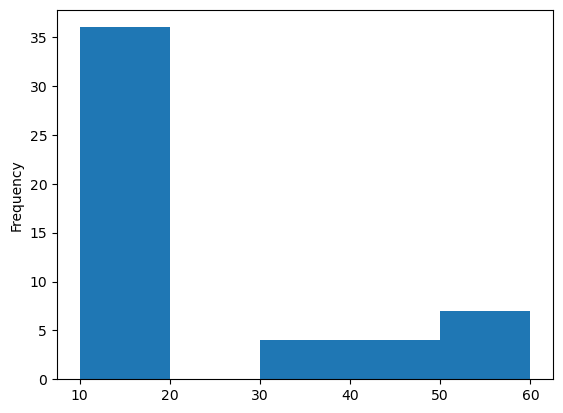

In [142]:
df["consumption_comb"].plot.hist(bins = [10,20,30,40,50,60])

In [143]:
df["consumption_comb"] = [(11 if x > 10 else x) if x != float('nan') else x for x in df["consumption_comb"]]

<AxesSubplot:ylabel='Frequency'>

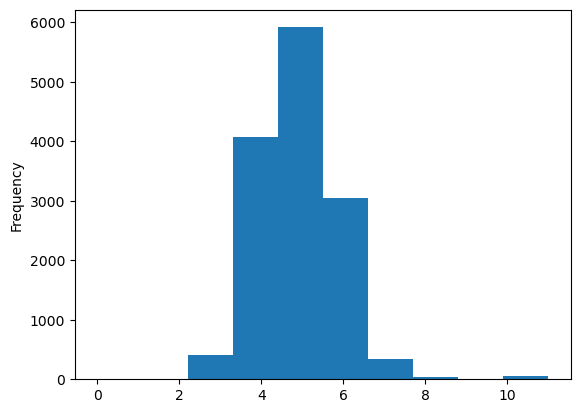

In [144]:
df["consumption_comb"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

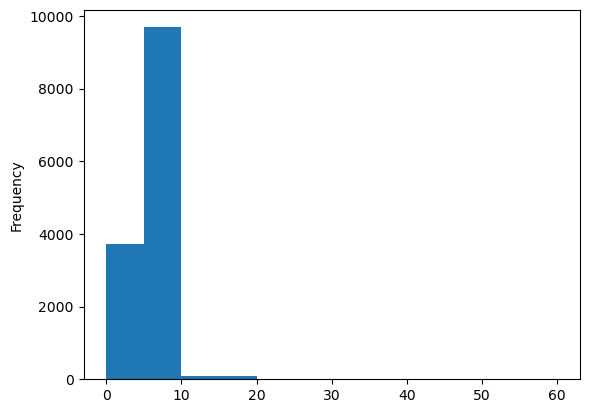

In [145]:
df["consumption_city"].plot.hist(bins = [0,5,10,20,60])

In [146]:
df["consumption_city"] = [(11 if x > 10 else x) if x != float('nan') else x for x in df["consumption_city"]]

<AxesSubplot:ylabel='Frequency'>

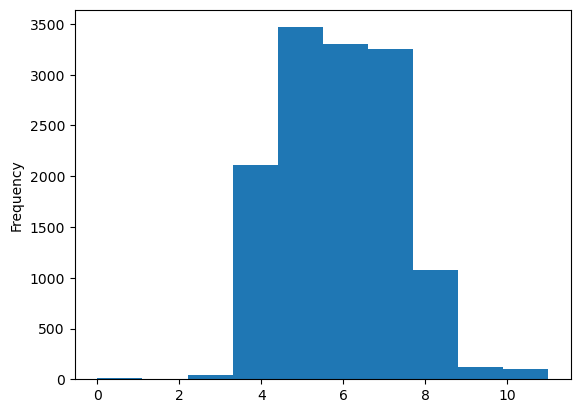

In [147]:
df["consumption_city"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

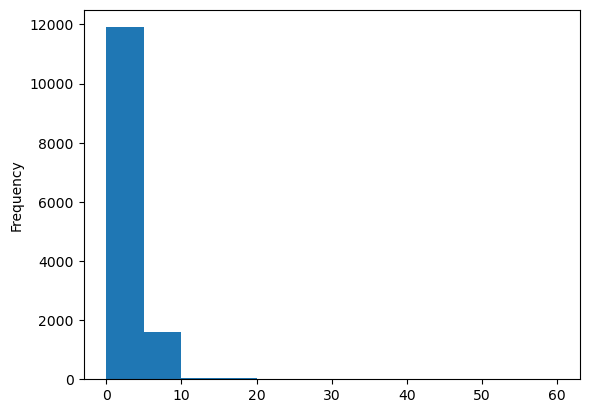

In [148]:
df["consumption_country"].plot.hist(bins = [0,5,10,20,60])

In [149]:
df["consumption_country"] = [(11 if x > 10 else x) if x != float('nan') else x for x in df["consumption_country"]]

<AxesSubplot:ylabel='Frequency'>

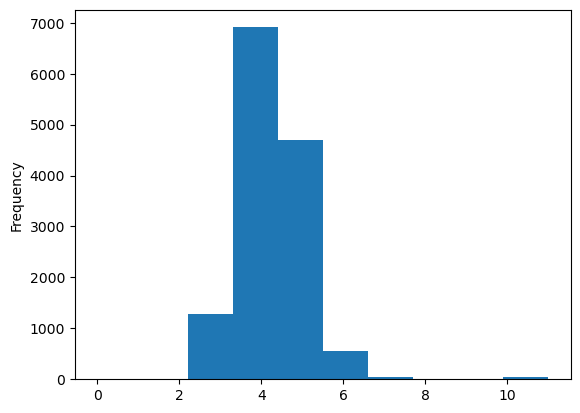

In [150]:
df["consumption_country"].plot.hist()

In [151]:
ignore.add('consumption')

Explore co2_emission

Mostly string in a list with extra '\n'

In [152]:
df['co2_emission'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n120 g CO2/km (comb)\n]      740
[[], [], []]                   628
[\n99 g CO2/km (comb)\n]       545
[\n97 g CO2/km (comb)\n]       537
[\n104 g CO2/km (comb)\n]      501
                              ... 
[\n14 g CO2/km (comb)\n]         1
[\n1,060 g CO2/km (comb)\n]      1
[\n51 g CO2/km (comb)\n]         1
[\n165 g CO2/km (comb)\n]        1
[\n193 g CO2/km (comb)\n]        1
Name: co2_emission, Length: 123, dtype: int64

In [153]:
df['co2_emission'] = [(re.sub('\n','',x[0]) if x[0].__class__ == str else float('nan')) 
                       if x.__class__ == list else x for x in df['co2_emission']]

In [154]:
df['co2_emission'].value_counts()[100:]
# no. suffixed with "g CO2/km (comb)"

171 g CO2/km (comb)       1
183 g CO2/km (comb)       1
1 g CO2/km (comb)         1
180 g CO2/km (comb)       1
177 g CO2/km (comb)       1
331 g CO2/km (comb)       1
181 g CO2/km (comb)       1
13,983 g CO2/km (comb)    1
184 g CO2/km (comb)       1
14,457 g CO2/km (comb)    1
14 g CO2/km (comb)        1
239 g CO2/km (comb)       1
1,060 g CO2/km (comb)     1
190 g CO2/km (comb)       1
990 g CO2/km (comb)       1
253 g CO2/km (comb)       1
160 g CO2/km (comb)       1
80 g CO2/km (comb)        1
51 g CO2/km (comb)        1
165 g CO2/km (comb)       1
12,324 g CO2/km (comb)    1
193 g CO2/km (comb)       1
Name: co2_emission, dtype: int64

In [155]:
df['co2_emission'] = [x.split(' ')[0] if x.__class__ == str else float('nan') for x in df['co2_emission']]
df['co2_emission'].value_counts()
# 12,087  13,983 14,457 12,324  1,060 seem too high, all together only 6. drop

120       740
99        545
97        537
104       501
102       477
         ... 
80          1
51          1
165         1
12,324      1
193         1
Name: co2_emission, Length: 122, dtype: int64

In [156]:
df['co2_emission'] = [(float('nan') if re.search(',', x) else int(x)) if x.__class__ == str 
                       else float('nan') for x in df['co2_emission']]
df['co2_emission'].value_counts()

120.0    740
99.0     545
97.0     537
104.0    501
102.0    477
        ... 
190.0      1
160.0      1
253.0      1
165.0      1
193.0      1
Name: co2_emission, Length: 117, dtype: int64

Explore entertainment_media

Make a set of entertainment media in the lists

Make dummy for each in the set, ignore entertainment_media

In [157]:
df['entertainment_media'].value_counts()
# each entry is a list with string entries if not missing

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                         1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                     982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]          783
[On-board computer, Radio]                                                                487
[Radio]                                                                                   477
                                                                                         ... 
[Bluetooth, CD player, MP3]                                                                 1
[CD player, USB]                                                                            1
[Bluetooth, CD player, Digital radio, Radio, USB]                                           1
[Bluetooth, CD player, Digital radio, MP3, On-board computer, Radio, Television, USB]       1
[Hands-free equipment, On-board computer, Radio, Sound syste

In [158]:
ent = set()
for x in df['entertainment_media']:
    if x.__class__ != list:
        continue
    for y in x:
        ent.add(y)
ent

{'Bluetooth',
 'CD player',
 'Digital radio',
 'Hands-free equipment',
 'MP3',
 'On-board computer',
 'Radio',
 'Sound system',
 'Television',
 'USB'}

In [159]:
for f in ent:
    name = 'entertainment_' + re.sub('\s|-','_',f.lower())
    df[name] = [(1 if f in x else 0) if x.__class__ == list else float('nan') for x in df['entertainment_media']]
    print(df[name].value_counts())

1.0    9305
0.0    5240
Name: entertainment_hands_free_equipment, dtype: int64
1.0    8158
0.0    6387
Name: entertainment_usb, dtype: int64
1.0    11650
0.0     2895
Name: entertainment_bluetooth, dtype: int64
1.0    11989
0.0     2556
Name: entertainment_radio, dtype: int64
0.0    9754
1.0    4791
Name: entertainment_cd_player, dtype: int64
0.0    12316
1.0     2229
Name: entertainment_digital_radio, dtype: int64
0.0    14510
1.0       35
Name: entertainment_television, dtype: int64
1.0    11938
0.0     2607
Name: entertainment_on_board_computer, dtype: int64
0.0    12305
1.0     2240
Name: entertainment_sound_system, dtype: int64
0.0    8692
1.0    5853
Name: entertainment_mp3, dtype: int64


In [160]:
ignore.add('entertainment_television')

Explore safety_security

Features in a list. 

As with entertainment_media, make a set. Make columns for each in the set. ignore safety_security. 

In [161]:
df['safety_security'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                           538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                                       480
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]      

In [162]:
saf = set()
for x in df['safety_security']:
    if x.__class__ != list:
        continue
    for y in x:
        saf.add(y)

In [163]:
saf

{'ABS',
 'Adaptive Cruise Control',
 'Adaptive headlights',
 'Alarm system',
 'Blind spot monitor',
 'Central door lock',
 'Central door lock with remote control',
 'Daytime running lights',
 'Driver drowsiness detection',
 'Driver-side airbag',
 'Electronic stability control',
 'Emergency brake assistant',
 'Emergency system',
 'Fog lights',
 'Head airbag',
 'Immobilizer',
 'Isofix',
 'LED Daytime Running Lights',
 'LED Headlights',
 'Lane departure warning system',
 'Night view assist',
 'Passenger-side airbag',
 'Power steering',
 'Rear airbag',
 'Side airbag',
 'Tire pressure monitoring system',
 'Traction control',
 'Traffic sign recognition',
 'Xenon headlights'}

In [164]:
for f in saf:
    name = 'safety_' + re.sub('\s|-','_',f.lower())
    df[name] = [(f in x) if x.__class__ == list else float('nan') for x in df['safety_security']]
    print(df[name].value_counts())

False    11872
True      3065
Name: safety_led_headlights, dtype: int64
False    13646
True      1291
Name: safety_blind_spot_monitor, dtype: int64
True     10604
False     4333
Name: safety_tire_pressure_monitoring_system, dtype: int64
True     13599
False     1338
Name: safety_power_steering, dtype: int64
False    9431
True     5506
Name: safety_led_daytime_running_lights, dtype: int64
False    14071
True       866
Name: safety_rear_airbag, dtype: int64
False    12961
True      1976
Name: safety_traffic_sign_recognition, dtype: int64
False    14431
True       506
Name: safety_driver_drowsiness_detection, dtype: int64
True     13902
False     1035
Name: safety_driver_side_airbag, dtype: int64
True     11744
False     3193
Name: safety_isofix, dtype: int64
True     10499
False     4438
Name: safety_immobilizer, dtype: int64
False    13361
True      1576
Name: safety_emergency_system, dtype: int64
True     11004
False     3933
Name: safety_traction_control, dtype: int64
False    12896
T

In [165]:
for f in ['safety_security', 'safety_emergency_brake_assistant']:
    ignore.add(f)

Explore nr_seats



In [166]:
df['nr_seats'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    13336
[\n4\n]     1125
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: nr_seats, dtype: int64

In [167]:
df['temp'] = [re.sub('\n','',x[0]).strip().lstrip() if x.__class__ == list else x for x in df['nr_seats']]
df['temp'].value_counts()

5    13336
4     1125
7      362
2      116
6        2
3        1
Name: temp, dtype: int64

In [168]:
df['nr_seats'] = df['temp']

In [169]:
df['nr_seats'].value_counts()

5    13336
4     1125
7      362
2      116
6        2
3        1
Name: nr_seats, dtype: int64

In [170]:
df['nr_seats'] = ['2' if x == '3' else ('7' if x == '6' else x) for x in df['nr_seats']]

In [171]:
df['nr_seats'].value_counts()

5    13336
4     1125
7      364
2      117
Name: nr_seats, dtype: int64

In [172]:
to_encode.add('nr_seats')

Explore comfort_convenience

List of features, convert to a binary column of their own, like in safety_features

In [173]:
df['comfort_convenience'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                                                                                                                                                                      216
[Air conditioning, Electrical side mirrors, Power windows]                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [174]:
com = set()
for x in df['comfort_convenience']:
    if x.__class__ != list:
        continue
    for y in x:
        com.add(y)
com

{'Air conditioning',
 'Air suspension',
 'Armrest',
 'Automatic climate control',
 'Auxiliary heating',
 'Cruise control',
 'Electric Starter',
 'Electric tailgate',
 'Electrical side mirrors',
 'Electrically adjustable seats',
 'Electrically heated windshield',
 'Heads-up display',
 'Heated steering wheel',
 'Hill Holder',
 'Keyless central door lock',
 'Leather seats',
 'Leather steering wheel',
 'Light sensor',
 'Lumbar support',
 'Massage seats',
 'Multi-function steering wheel',
 'Navigation system',
 'Panorama roof',
 'Park Distance Control',
 'Parking assist system camera',
 'Parking assist system self-steering',
 'Parking assist system sensors front',
 'Parking assist system sensors rear',
 'Power windows',
 'Rain sensor',
 'Seat heating',
 'Seat ventilation',
 'Split rear seats',
 'Start-stop system',
 'Sunroof',
 'Tinted windows',
 'Wind deflector',
 'Windshield'}

In [175]:
for f in com:
    name = 'comfort_' + re.sub('\s|-','_',f.lower())
    df[name] = [(f in x) if x.__class__ == list else float('nan') 
                for x in df['comfort_convenience']]
    print(df[name].value_counts())

False    14958
True        41
Name: comfort_wind_deflector, dtype: int64
False    14062
True       937
Name: comfort_electrically_heated_windshield, dtype: int64
True     8166
False    6833
Name: comfort_navigation_system, dtype: int64
False    12386
True      2613
Name: comfort_keyless_central_door_lock, dtype: int64
False    14231
True       768
Name: comfort_parking_assist_system_self_steering, dtype: int64
False    9161
True     5838
Name: comfort_parking_assist_system_sensors_front, dtype: int64
True     13914
False     1085
Name: comfort_power_windows, dtype: int64
True     9386
False    5613
Name: comfort_leather_steering_wheel, dtype: int64
False    7921
True     7078
Name: comfort_seat_heating, dtype: int64
True     7672
False    7327
Name: comfort_light_sensor, dtype: int64
False    12612
True      2387
Name: comfort_split_rear_seats, dtype: int64
False    14627
True       372
Name: comfort_sunroof, dtype: int64
True     9694
False    5305
Name: comfort_parking_assist_system_

C:\Users\arsha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


In [176]:
for f in ['parking_assist_system_sensors_front', 'lumbar_support', 'parking_assist_system_camera', 
          'wind_deflector', 'electrically_adjustable_seats']:
    ignore.add('comfort_' + f)
# aux heating in 1 case 

Explore displacement

string in a list. Number has comma and suff of cc

It is not a continuous variable, should be encoded. 

5 classes: <500, 500-1000, 1000-1500, 1500-2000, 2000+

In [177]:
df['displacement'].value_counts()[50:]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n1,580 cc\n]     1
[\n1,995 cc\n]     1
[\n1,333 cc\n]     1
[\n54 cc\n]        1
[\n1,533 cc\n]     1
[\n1,100 cc\n]     1
[\n1,350 cc\n]     1
[\n16,000 cc\n]    1
[\n1,856 cc\n]     1
[\n1,568 cc\n]     1
[\n1,896 cc\n]     1
[\n1,584 cc\n]     1
[\n996 cc\n]       1
[\n1,696 cc\n]     1
[\n1,686 cc\n]     1
[\n15,898 cc\n]    1
[\n1,368 cc\n]     1
[\n140 cc\n]       1
[\n973 cc\n]       1
[\n1,239 cc\n]     1
[\n1,369 cc\n]     1
[\n1,390 cc\n]     1
[\n122 cc\n]       1
[\n1,198 cc\n]     1
[\n1,195 cc\n]     1
[\n2,967 cc\n]     1
[\n1,800 cc\n]     1
Name: displacement, dtype: int64

In [178]:
df['temp'] = [int(re.sub('\n| cc|,','',x[0])) if x.__class__ == list else float('nan') for x in df['displacement']]
df['temp'].min(), df['temp'].max()

(1.0, 16000.0)

In [179]:
df['temp'][df['temp']>2000].count()

23

In [180]:
df['temp'][df['temp']<500].count()

51

<AxesSubplot:ylabel='Frequency'>

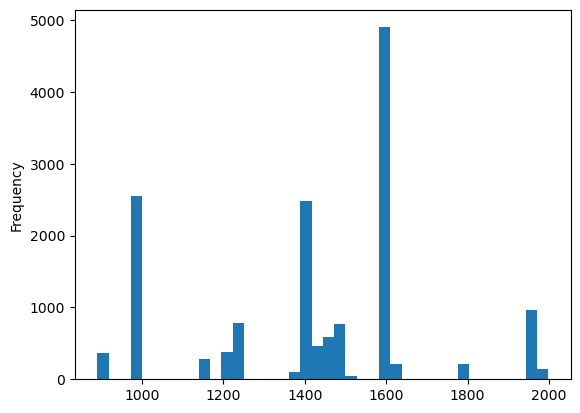

In [181]:
df['temp'][df['temp']>500][df['temp']<2000].plot.hist(bins=40)

In [182]:
temp = [float('nan') if x>500 else x for x in df['temp']]
df['displacement_lt500'] = temp.copy()

C:\Users\arsha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [183]:
temp = [x if (x>500 and x<1000) else float('nan') for x in df['temp']]
df['displacement_500_1000']  = temp.copy()

C:\Users\arsha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [184]:
temp = [float('nan') if (x<1000 or x>1500) else x for x in df['temp']]
df['displacement_1000_1500'] = temp.copy()

C:\Users\arsha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [185]:
temp =  [x if (x>1500 and x<2000) else float('nan') for x in df['temp']]
df['displacement_1500_2000'] = temp.copy()

C:\Users\arsha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [186]:
temp = [float('nan') if (x<2000) else x for x in df['temp']]
df['displacement_gt2000'] = temp.copy()

C:\Users\arsha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [187]:
ignore.add('displacement')

Explore 'nr_doors'
 
Number of doors 1 - 7, encode

In [188]:
df['nr_doors'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
[\n1\n]        1
[\n7\n]        1
Name: nr_doors, dtype: int64

In [189]:
df['temp'] = [re.sub('\n','',x[0]).lstrip().strip() if x.__class__ == list else x for x in df['nr_doors']]
df['temp'] = ['2' if float(x) < 2 else ('5' if float(x) > 5 else x) for x in df['temp']]

In [190]:
df['temp'].value_counts()

5    11576
4     3079
3      832
2      220
Name: temp, dtype: int64

In [191]:
df['nr_doors'] = df['temp']

In [192]:
to_encode.add('nr_doors')

Explore 

body_type, body

body_type is cleaned version of body, ignore body

encode body_type

In [193]:
df['body'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: body, dtype: int64

In [194]:
df['body_type'].value_counts()

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [195]:
df['body_type'] = [x.lower() if x.__class__ == str else x for x in df['body_type']]

In [196]:
ignore.add('body')
to_encode.add('body_type')

Explore short_description

Very little overlap in descriptions. Will ignore this column.


In [197]:
df['short_description'].value_counts()

SPB 1.6 TDI 116 CV S tronic Sport                 64
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
SPB 30 TFSI S tronic Admired                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10001, dtype: int64

In [198]:
ignore.add('short_description')

Explore description

Description seems to be in German. 

It will take a lot of time to translate this to be able to use as features. I will ignore this for now.

In [199]:
ignore.add('description')

Explore fuel

The entries seem to be in the list at index 1 rather than 0

This classification seems to be misleading. Make a set of all entries in the list, separated by '/'

There are 27 classes. Too many. 

Collapse to diesel, petrol, LPG and other.

In [200]:
df['fuel'].value_counts()[:50]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Diesel (Particulate Filter), \n]                                                                                  4315
[\n, Super 95, \n]                                                                                                     3338
[\n, Gasoline, \n]                                                                                                     3175
[\n, Diesel, \n]                                                                                                       2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                 424
[\n, Regular/Benzine 91, \n]                                                                                            354
[\n, Super E10 95, \n]                                                                                                  331
[\n, Super 95 (Particulate Filter), \n]                                                                                 268
[\n, Sup

In [201]:
df['temp'] = [[y.lstrip().strip() for y in x[1].split('/')] if re.search('/',x[1]) else x[1]
                 if x.__class__ == list else x for x in df['fuel']]

In [202]:
df['temp'].value_counts()[:50]

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


Diesel (Particulate Filter)                                                                                 4315
Super 95                                                                                                    3338
Gasoline                                                                                                    3175
Diesel                                                                                                      2984
[Super 95, Regular, Benzine 91]                                                                              424
[Regular, Benzine 91]                                                                                        354
Super E10 95                                                                                                 331
Super 95 (Particulate Filter)                                                                                268
[Super 95, Super E10 95]                                                                        

In [203]:
temp = set() 
for x in df['temp']:
    if x.__class__ != list:
        temp.add(x)
        continue
    for y in x:
        for z in y.split('/'):
                temp.add(z)
        else:
            temp.add(y)
temp

{'Benzine 91',
 'Benzine 91 (Particulate Filter)',
 'Benzine E10 91',
 'Benzine E10 91 (Particulate Filter)',
 'Biodiesel',
 'Biogas',
 'CNG',
 'CNG (Particulate Filter)',
 'Diesel',
 'Diesel (Particulate Filter)',
 'Domestic gas H',
 'Electric',
 'Gasoline',
 'Gasoline (Particulate Filter)',
 'LPG',
 'Liquid petroleum gas (LPG)',
 'Others',
 'Others (Particulate Filter)',
 'Regular',
 'Super 95',
 'Super 95 (Particulate Filter)',
 'Super E10 95',
 'Super E10 95 (Particulate Filter)',
 'Super Plus 98',
 'Super Plus 98 (Particulate Filter)',
 'Super Plus E10 98',
 'Super Plus E10 98 (Particulate Filter)'}

In [204]:
len(temp)

27

In [205]:
# 'gas', 'diesel', 'other'
fuel_d = {'Benzine 91': 'gas',
 'Benzine 91 (Particulate Filter)': 'gas',
 'Benzine E10 91': 'gas',
 'Benzine E10 91 (Particulate Filter)': 'gas',
 'Biodiesel': 'other',
 'Biogas': 'other',
 'CNG': 'other',
 'CNG (Particulate Filter)': 'other',
 'Diesel':'diesel',
 'Diesel (Particulate Filter)':'diesel',
 'Domestic gas H':'other',
 'Electric':'other',
 'Gasoline': 'gas',
 'Gasoline (Particulate Filter)': 'gas',
 'LPG': 'other',
 'Liquid petroleum gas (LPG)':'other',
 'Others': 'other',
 'Others (Particulate Filter)': 'other',
 'Regular' : 'gas',
 'Super 95': 'gas',
 'Super 95 (Particulate Filter)' : 'gas',
 'Super E10 95' : 'gas',
 'Super E10 95 (Particulate Filter)': 'gas',
 'Super Plus 98': 'gas',
 'Super Plus 98 (Particulate Filter)': 'gas',
 'Super Plus E10 98': 'gas',
 'Super Plus E10 98 (Particulate Filter)' : 'gas'}

In [206]:
gas = set([k for k in fuel_d.keys() if fuel_d[k]=='gas'])
diesel = set([k for k in fuel_d.keys() if fuel_d[k]=='diesel'])
other = set([k for k in fuel_d.keys() if fuel_d[k]=='other'])

In [207]:
gas, diesel, other

({'Benzine 91',
  'Benzine 91 (Particulate Filter)',
  'Benzine E10 91',
  'Benzine E10 91 (Particulate Filter)',
  'Gasoline',
  'Gasoline (Particulate Filter)',
  'Regular',
  'Super 95',
  'Super 95 (Particulate Filter)',
  'Super E10 95',
  'Super E10 95 (Particulate Filter)',
  'Super Plus 98',
  'Super Plus 98 (Particulate Filter)',
  'Super Plus E10 98',
  'Super Plus E10 98 (Particulate Filter)'},
 {'Diesel', 'Diesel (Particulate Filter)'},
 {'Biodiesel',
  'Biogas',
  'CNG',
  'CNG (Particulate Filter)',
  'Domestic gas H',
  'Electric',
  'LPG',
  'Liquid petroleum gas (LPG)',
  'Others',
  'Others (Particulate Filter)'})

In [208]:
set_name_d = {'gas': gas, 'diesel': diesel, 'other':other}

In [209]:
# for each entry (list or srt) in df['temp'] 
#     go through the names in the set_name_d.keys():
#         if the content is in the set at set_name_d[name]:
#             replace entry with name
fuel = [i for i in df['temp']]
fuel_new = [float('nan') for _ in df['temp']]
for i, f in enumerate(fuel):
    if f.__class__ == str:
        for name in set_name_d.keys():
            if f in set_name_d[name]:
                fuel_new[i] = name
                break # for loop
    elif f.__class__ == list:
        go_on = True
        for x in f:
            if not go_on:
                break
            for name in set_name_d.keys():
                if x in set_name_d[name]:
                    fuel_new[i] = name
                    go_on = False # break for x in f
                    break # break for name in ...

In [210]:
df['temp'] = fuel_new

In [211]:
df['temp'].value_counts()

gas       8545
diesel    7299
other       75
Name: temp, dtype: int64

In [212]:
df['fuel_type'] = fuel_new

C:\Users\arsha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


In [213]:
to_encode.add('fuel_type')
ignore.add('fuel')

Explore gearing_type

Simplified from list to string

added to to_encode

In [214]:
df['gearing_type'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: gearing_type, dtype: int64

In [215]:
df['gearing_type'] = [x[1].lstrip().strip().lower() if x.__class__ == list else x for x in df['gearing_type']]

In [216]:
df['gearing_type'].value_counts()

manual            8153
automatic         7297
semi-automatic     469
Name: gearing_type, dtype: int64

In [217]:
to_encode.add('gearing_type')

Explore make, model, make_model

Make make_model "Audi A2"  into "Audi A1"

encode make_model

ignore make, model

In [218]:
df['make'].value_counts()

Opel       7343
Audi       5712
Renault    2864
Name: make, dtype: int64

In [219]:
df['model'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: model, dtype: int64

In [220]:
df['model'][df['make'] == 'Audi'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, A3, \n]    3097
[\n, A1, \n]    2614
[\n, A2, \n]       1
Name: model, dtype: int64

In [221]:
df['make_model'][df['make'] == 'Audi'].value_counts()

Audi A3    3097
Audi A1    2614
Audi A2       1
Name: make_model, dtype: int64

In [222]:
df['make_model'] = ['Audi A1' if x == 'Audi A2' else x for x in df['make_model']]

In [223]:
df['make_model'].value_counts()

Audi A3           3097
Audi A1           2615
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Name: make_model, dtype: int64

In [224]:
df['make_model'] = [re.sub('\s|-','_',x.lower()) if x.__class__ == str else x for x in df['make_model']]
df['make_model'].value_counts()

audi_a3           3097
audi_a1           2615
opel_insignia     2598
opel_astra        2526
opel_corsa        2219
renault_clio      1839
renault_espace     991
renault_duster      34
Name: make_model, dtype: int64

In [225]:
to_encode.add('make_model')

Explore null

ignore null

In [226]:
df['null'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]    15919
Name: null, dtype: int64

In [227]:
ignore.add('null')

Explore hp (horse power?)

Consistent suffix kW

Continuous variable, replace with numbers, remove kW

In [228]:
df['hp'].value_counts()[:50]

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
82 kW       22
52 kW       22
78 kW       20
1 kW        20
294 kW      18
146 kW      18
141 kW      16
57 kW       10
104 kW       8
120 kW       8
191 kW       7
112 kW       7
155 kW       6
117 kW       6
184 kW       5
90 kW        4
76 kW        4
Name: hp, dtype: int64

In [229]:
df['temp'] = [re.sub('[A-Za-z]','',x) for x in df['hp']]
df['temp'] = [re.sub('-','',x.lstrip().strip()) for x in df['temp']]
df['temp'] = [float('nan') if x == '' else int(x) for x in df['temp']]

In [230]:
df['temp'].value_counts()

85.0     2542
66.0     2122
81.0     1402
100.0    1308
110.0    1112
         ... 
137.0       1
9.0         1
44.0        1
133.0       1
239.0       1
Name: temp, Length: 80, dtype: int64

In [231]:
df['hp'] = df['temp']

Explore registration, first_registration

Making new variable: registration_continuous as a float 

first_registration is cleaned registration_years

In [232]:
df['registration'].value_counts()

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64

In [233]:
temp = [x.split('/')[1] if x.__class__ == str else x for x in df['registration']]
temp = [float('nan') if x=='-' else x for x in temp]
df['registration_year'] = temp.copy()

C:\Users\arsha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [234]:
df['registration_year'].value_counts()

2018    4522
2016    3674
2017    3273
2019    2853
Name: registration_year, dtype: int64

In [235]:
df['first_registration'] = df['registration_year'].copy()

In [236]:
df['registration_year'] = [float(x) for x in df['registration_year']]

In [237]:
temp = [x.split('/')[0] if x.__class__ == str else x for x in df['registration']]
temp = [float('nan') if x=='-' else int(x) for x in temp]
df['registration_month'] = temp.copy()

C:\Users\arsha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [238]:
df['registration_month'].value_counts()

3.0     2245
2.0     1964
4.0     1959
5.0     1875
1.0     1734
6.0     1617
7.0      793
8.0      494
9.0      436
11.0     433
10.0     411
12.0     361
Name: registration_month, dtype: int64

In [239]:
df['registration_continuous'] = df['registration_year'] + df['registration_month']/12

C:\Users\arsha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.


In [240]:
df['registration_continuous'].value_counts()

2018.250000    695
2019.166667    585
2018.416667    572
2019.250000    543
2018.333333    541
2019.083333    541
2018.166667    539
2016.250000    536
2016.333333    532
2018.500000    532
2018.083333    511
2019.333333    506
2016.166667    472
2017.250000    471
2016.416667    459
2016.500000    452
2019.416667    440
2017.500000    409
2017.416667    404
2018.583333    396
2017.333333    380
2016.083333    376
2017.166667    368
2017.083333    306
2018.666667    285
2019.500000    224
2017.583333    215
2017.916667    180
2016.583333    176
2016.833333    160
2017.833333    154
2017.750000    149
2016.916667    142
2018.750000    141
2016.750000    141
2017.000000    134
2018.000000    123
2017.666667    114
2018.916667    110
2019.000000    103
2018.833333     97
2016.666667     94
2019.583333      6
2019.750000      5
2019.666667      1
2019.916667      1
2020.000000      1
Name: registration_continuous, dtype: int64

In [241]:
df['first_registration'].value_counts()

2018    4522
2016    3674
2017    3273
2019    2853
Name: first_registration, dtype: int64

In [242]:
ignore.add('registration')
ignore.add('registration_month')
to_encode.add('first_registration')

Explore km

make integers by removing string characters

In [243]:
df['km'].value_counts()

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
67,469 km       1
43,197 km       1
10,027 km       1
35,882 km       1
57 km           1
Name: km, Length: 6690, dtype: int64

In [244]:
df['temp'] = [re.sub(',| km|-','',x).lstrip().strip() for x in df['km']]
df['temp'] = [float('nan') if x=='' else int(x) for x in df['temp']]
df['temp'].value_counts()

10.0       1045
1.0         367
5.0         170
50.0        148
100.0       139
           ... 
67469.0       1
43197.0       1
10027.0       1
35882.0       1
57.0          1
Name: temp, Length: 6689, dtype: int64

In [245]:
df['km'] = df['temp']

<AxesSubplot:ylabel='Frequency'>

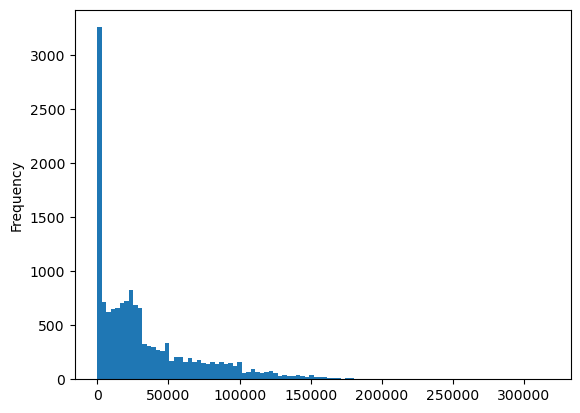

In [246]:
df['km'].plot.hist(bins=100)

In [247]:
df['km'] = [200001 if x > 200000 else x for x in df['km']]

<AxesSubplot:ylabel='Frequency'>

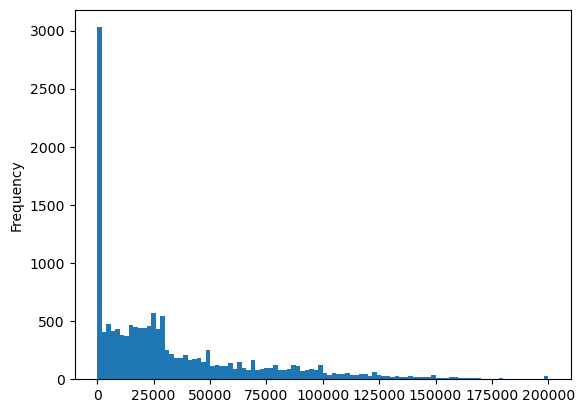

In [248]:
df['km'].plot.hist(bins=100)

Explore price

Maybe drop rows with <5000 and >60000?

In [249]:
df['price'].value_counts().sort_index()

13       1
120      1
255      1
331      1
4950     1
        ..
64332    1
64900    1
67600    1
68320    1
74600    1
Name: price, Length: 2956, dtype: int64

<AxesSubplot:ylabel='Frequency'>

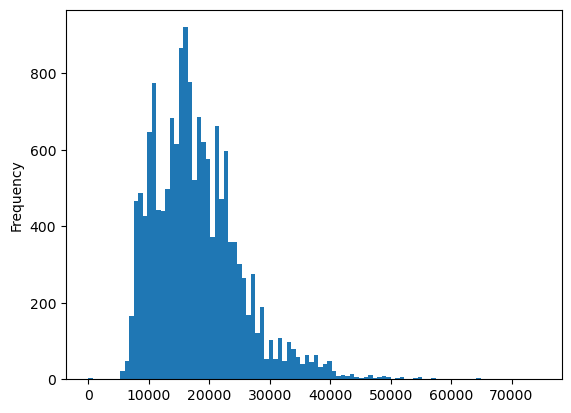

In [250]:
df['price'].plot.hist(bins = 100)

In [251]:
df['price'][df['price']>50000].count()

45

In [252]:
df['price'][df['price']<6500].count()

60

In [253]:
df = pd.get_dummies(df, columns=to_encode)

In [254]:
cols = [i for i in df.columns]

In [255]:
len(cols)

235

In [256]:
ignore.add('url')

In [257]:
ignore

{'availability',
 'available_from',
 'body',
 'body_color_original',
 'comfort_electrically_adjustable_seats',
 'comfort_lumbar_support',
 'comfort_parking_assist_system_camera',
 'comfort_parking_assist_system_sensors_front',
 'comfort_wind_deflector',
 'consumption',
 'country_version',
 'description',
 'displacement',
 'electricity_consumption',
 'entertainment_television',
 'extra_catalytic converter',
 'extra_sport package',
 'extra_tuned car',
 'extra_winter_tyres',
 'fuel',
 'full_service',
 'inspection_new',
 'last_service_date',
 'model_code',
 'next_inspection',
 'non_smoking_vehicle',
 'null',
 'offer_number',
 'other_fuel_types',
 'previous_owners',
 'registration',
 'registration_month',
 'safety_emergency_brake_assistant',
 'safety_security',
 'short_description',
 'upholstery',
 'url',
 'vat',
 'warranty'}

In [258]:
df2 = df[[x for x in df.columns if x not in ignore] ]

In [259]:
df2.columns

Index(['price', 'km', 'kw', 'hp', 'non-smoking_vehicle', 'make', 'model',
       'weight', 'co2_emission', 'emission_class',
       ...
       'cylinders_3_or_less', 'cylinders_4_or_more', 'make_model_audi_a1',
       'make_model_audi_a3', 'make_model_opel_astra', 'make_model_opel_corsa',
       'make_model_opel_insignia', 'make_model_renault_clio',
       'make_model_renault_duster', 'make_model_renault_espace'],
      dtype='object', length=200)

In [260]:
df2.to_json('data.json', orient='records', lines=True)